In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scrape_results import scrape_results

In [5]:
results = scrape_results('2024-07-04')

In [46]:
results2 = scrape_results('2024-06-30')

In [63]:
results3 = scrape_results('2024-06-01')

In [76]:
results4 = scrape_results('2024-05-27')

In [77]:
results4

,players,Team,bet_type,value
0,Charlie Blackmon,COL,Hits,3
1,Andrew Benintendi,CHW,Hits,3
2,Kyle Stowers,BAL,Hits,3
3,Jacob Young,WSN,Hits,3
4,George Springer,TOR,Hits,2
...,...,...,...,...
1465,Ezequiel Tovar,COL,Total Bases,0
1466,Jarren Duran,BOS,Total Bases,0
1467,Joey Ortiz,MIL,Total Bases,0
1468,Gunnar Henderson,BAL,Total Bases,0


In [65]:
results5 = scrape_results('2024-06-29')

In [81]:
odds = pd.read_csv('data\\2024-07-04_14-54-08.csv')
odds2 = pd.read_csv('data\\2024-06-30_14-52-19.csv')
odds3 = pd.read_csv('data\\2024-06-01_17-59-03.csv')
odds4 = pd.read_csv('data\\2024-05-27_10-38-09.csv')
odds5 = pd.read_csv('data\\2024-06-29_14-45-57.csv')

In [82]:
simulate_bets = pd.merge(odds.iloc[:,[0, 1, 2, 4, 5]], results, on = ['players', 'bet_type'], how ='inner')
simulate_bets2 = pd.merge(odds2.iloc[:,[0, 1, 2, 4, 5]], results2, on = ['players', 'bet_type'], how ='inner')
simulate_bets3 = pd.merge(odds3.iloc[:,[0, 1, 2, 4, 5]], results3, on = ['players', 'bet_type'], how ='inner')
simulate_bets4 = pd.merge(odds4.iloc[:,[2, 3, 4, 6, 7]], results4, on = ['players', 'bet_type'], how ='inner')
simulate_bets5 = pd.merge(odds5.iloc[:,[0, 1, 2, 4, 5]], results5, on = ['players', 'bet_type'], how ='inner')

In [83]:
simulate_bets = pd.concat([simulate_bets, simulate_bets2, simulate_bets3, simulate_bets4, simulate_bets5])

In [84]:
simulate_bets.loc[simulate_bets['over_lines'] > simulate_bets['value'], 'over/under'] = 'under'
simulate_bets.loc[simulate_bets['over_lines'] < simulate_bets['value'], 'over/under'] = 'over'

In [95]:
simulate_bets[(simulate_bets['players'] == 'Matt Chapman') & (simulate_bets['bet_type'] == 'Runs')]

,players,over_lines,over_odds,under_odds,bet_type,Team,value,over/under


In [86]:
over_profit = []
under_profit = []
wagered_list = []
for bet_type in simulate_bets['bet_type'].unique():
    under = simulate_bets[(simulate_bets['bet_type'] == bet_type) & (simulate_bets['over/under'] == 'under')]
    over = simulate_bets[(simulate_bets['bet_type'] == bet_type) & (simulate_bets['over/under'] == 'over')]
    wagered = (len(under) + len(over)) * 10
    over_rev = np.sum(over['over_odds'] * 10)
    under_rev = np.sum(under['under_odds'] * 10)
    over_profit.append(over_rev - wagered)
    under_profit.append(under_rev - wagered)
    wagered_list.append(wagered)
market_anal = pd.DataFrame({'bet_type':simulate_bets['bet_type'].unique(),
              'over_profit':over_profit,
              'under_profit':under_profit,
              'wagered':wagered_list})


In [87]:
market_anal['over_roi'] = market_anal['over_profit'] / market_anal['wagered']
market_anal['under_roi'] = market_anal['under_profit'] / market_anal['wagered']

In [89]:
market_anal.to_csv('market_anal.csv')

In [24]:
test = simulate_bets[(simulate_bets['bet_type'] == 'Total Bases') & (simulate_bets['over/under'] == 'under')]
test2 = simulate_bets[(simulate_bets['bet_type'] == 'Total Bases') & (simulate_bets['over/under'] == 'over')]

In [28]:
(len(test) + len(test2)) * 10

780

In [27]:
np.sum(test2['over_odds'] * 10)

579.0

In [19]:
test['under_odds']

,players,over_lines,over_odds,under_odds,bet_type,Team,value,over/under
0,Brandon Drury,0.5,5.75,1.111,Home Runs,LAA,0,under
1,Brent Rooker,0.5,3.95,1.222,Home Runs,OAK,0,under
2,Brett Harris,0.5,8.00,1.056,Home Runs,OAK,0,under
3,JJ Bleday,0.5,4.60,1.167,Home Runs,OAK,0,under
4,Jo Adell,0.5,5.25,1.133,Home Runs,LAA,0,under
...,...,...,...,...,...,...,...,...
640,Geraldo Perdomo,0.5,13.00,1.005,Home Runs,ARI,0,under
641,Joc Pederson,0.5,4.00,1.222,Home Runs,ARI,1,over
642,Ketel Marte,0.5,5.00,1.143,Home Runs,ARI,0,under
643,Lourdes Gurriel Jr.,0.5,5.50,1.125,Home Runs,ARI,0,under


In [9]:
batting_stats = pd.read_csv('batting_stats.csv', index_col = 0)

In [11]:
batting_stats.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos Summary', 'Name-additional'],
      dtype='object')

In [14]:
batting_stats.drop(['Lg', 'Pos Summary', 'Name-additional'], axis = 1, inplace = True)

In [20]:
batting_stats['Tm'] = batting_stats['Tm'].astype('category')
batting_stats['Tm'] = batting_stats['Tm'].cat.codes

In [22]:
batting_stats.iloc[:, 1:].corr()

,Age,Tm,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
Age,1.000000,0.003072,-0.014971,-0.014784,-0.020002,-0.032571,-0.025732,-0.013468,-0.161954,0.002583,...,0.032332,-0.013657,0.003710,0.006399,-0.023650,0.089989,0.052982,-0.090942,-0.031541,0.021570
Tm,0.003072,1.000000,0.032710,0.022037,0.019884,-0.002858,0.010091,-0.024797,-0.069808,-0.027830,...,0.104435,0.021882,0.056143,0.084337,-0.008868,0.044619,0.001658,0.049039,-0.012090,-0.028899
G,-0.014971,0.032710,1.000000,0.972029,0.971739,0.905558,0.934292,0.872743,0.455966,0.758990,...,0.333612,0.348493,0.363769,0.360418,0.916838,0.718637,0.608595,0.218739,0.602380,0.382623
PA,-0.014784,0.022037,0.972029,1.000000,0.998403,0.951104,0.976490,0.913276,0.475357,0.820775,...,0.351436,0.382240,0.393271,0.389263,0.966761,0.746774,0.612190,0.142700,0.617837,0.436062
AB,-0.020002,0.019884,0.971739,0.998403,1.000000,0.944494,0.977883,0.911126,0.477080,0.811014,...,0.336820,0.377662,0.384418,0.379655,0.964407,0.747915,0.597646,0.144887,0.607724,0.422110
R,-0.032571,-0.002858,0.905558,0.951104,0.944494,1.000000,0.955591,0.900153,0.529337,0.858335,...,0.391439,0.441473,0.448469,0.443714,0.966737,0.671854,0.592937,0.118872,0.573545,0.485073
H,-0.025732,0.010091,0.934292,0.976490,0.977883,0.955591,1.000000,0.925956,0.499324,0.816630,...,0.401723,0.440489,0.451892,0.446948,0.982128,0.733372,0.580592,0.127361,0.583418,0.464424
2B,-0.013468,-0.024797,0.872743,0.913276,0.911126,0.900153,0.925956,1.000000,0.466063,0.777936,...,0.375284,0.444834,0.444281,0.437600,0.934042,0.683437,0.590505,0.071729,0.587167,0.450195
3B,-0.161954,-0.069808,0.455966,0.475357,0.477080,0.529337,0.499324,0.466063,1.000000,0.358333,...,0.189469,0.261541,0.248732,0.237797,0.510463,0.174137,0.261051,0.191070,0.238560,0.200384
HR,0.002583,-0.027830,0.758990,0.820775,0.811014,0.858335,0.816630,0.777936,0.358333,1.000000,...,0.321442,0.500642,0.459925,0.449886,0.904559,0.612339,0.487095,-0.035544,0.519848,0.573227


In [52]:
ab = pd.read_csv('2023pa.csv')
pa1 = np.array(ab['visitor_pa'])
pa2 = np.array(ab['home_pa'])
pa = np.concatenate((pa1, pa2))
sample = np.random.choice(pa, size=1000, replace=False)
base_pa = (sample // 9)
extra = sample % 9
arr_stack = []
for i in range(1, 9):
    arr_stack.append(np.where(extra >= i, base_pa + 1, base_pa))
arr_stack.append(base_pa)

In [53]:
arr = np.stack(arr_stack)

In [58]:
batting_lineup = pd.read_csv('batting_lineup.csv')

In [59]:
batting_lineup

,Unnamed: 0,name,batting_order,team,opp_pitcher
0,0,Luis Arraez,1,Padres,Josh Winckowski
1,1,Jurickson Profar,2,Padres,Josh Winckowski
2,2,Jake Cronenworth,3,Padres,Josh Winckowski
3,3,Manny Machado,4,Padres,Josh Winckowski
4,4,Donovan Solano,5,Padres,Josh Winckowski
...,...,...,...,...,...
247,247,Austin Riley,5,Braves,Bailey Falter
248,248,Adam Duvall,6,Braves,Bailey Falter
249,249,Sean Murphy,7,Braves,Bailey Falter
250,250,Orlando Arcia,8,Braves,Bailey Falter


In [60]:
batting_lineup = batting_lineup[['name', 'batting_order']]

In [61]:
batting_stats = pd.read_csv('2024batstats.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2024batstats.csv'

In [34]:
test = pd.merge(batting_lineup, batting_stats, left_on = 'fullName', right_on = 'Name', how = 'left')[['fullName', 'batting_order', 'PA', 'H']]

In [35]:
test

,fullName,batting_order,PA,H
0,Nico Hoerner,1,311,68
1,Michael Busch,2,272,60
2,Cody Bellinger,3,300,73
3,Seiya Suzuki,4,250,59
4,Ian Happ,5,323,63
5,Christopher Morel,6,338,57
6,Dansby Swanson,7,280,55
7,Pete Crow-Armstrong,8,137,24
8,Tomás Nido,9,102,20
9,Brice Turang,1,312,80


In [36]:
def simulate_hits(row):
    pa = np.random.choice(arr[row['batting_order'] - 1], size = 1000, replace=False).astype(np.int32)
    num_successes = np.random.binomial(pa, row['H'] / row['PA'])
    return len(num_successes[num_successes >= 1]) / len(num_successes)

test['hit_prob'] = test.apply(simulate_hits, axis = 1)


In [84]:
def simulate_hits(row):
    pa = np.random.choice(arr[1], size = 1000, replace=False).astype(np.int32)
    for i in range(pa):
        ab = np.random.choice([0, 1, 2], p=[0.22, 0.08, 0.7])
    
    return len(num_successes[num_successes >= 1]) / len(num_successes)

simulate_hits('pop')

0.621

In [37]:
odds = pd.read_csv('2024-06-29_14-45-57.csv')

In [38]:
hit_odds = odds[odds['bet_type'] == 'Hits']

In [39]:
hit_odds

,players,over_lines,over_odds,under_lines,under_odds,bet_type,home_tm,away_tm,date,hold,over_true_prob,under_true_prob
35,Aaron Judge,0.5,1.357,0.5,2.950,Hits,TOR Blue Jays,NY Yankees,2024-06-29,0.076,0.707,0.293
36,Alejandro Kirk,0.5,1.526,0.5,2.400,Hits,TOR Blue Jays,NY Yankees,2024-06-29,0.072,0.624,0.376
37,Alex Verdugo,1.5,3.000,1.5,1.351,Hits,TOR Blue Jays,NY Yankees,2024-06-29,0.074,0.288,0.712
38,Anthony Volpe,1.5,2.950,1.5,1.370,Hits,TOR Blue Jays,NY Yankees,2024-06-29,0.069,0.297,0.703
39,Austin Wells,0.5,1.526,0.5,2.400,Hits,TOR Blue Jays,NY Yankees,2024-06-29,0.072,0.624,0.376
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,Mitch Garver,0.5,1.833,0.5,1.870,Hits,SEA Mariners,MIN Twins,2024-06-29,0.080,0.506,0.494
2187,Royce Lewis,0.5,1.465,0.5,2.550,Hits,SEA Mariners,MIN Twins,2024-06-29,0.075,0.651,0.349
2188,Trevor Larnach,0.5,1.435,0.5,2.650,Hits,SEA Mariners,MIN Twins,2024-06-29,0.074,0.666,0.334
2189,Ty France,0.5,1.690,0.5,2.050,Hits,SEA Mariners,MIN Twins,2024-06-29,0.080,0.554,0.446


In [40]:
bets = pd.merge(test, hit_odds, left_on='fullName', right_on='players', how ='left')

In [45]:
test

,fullName,batting_order,PA,H,hit_prob
0,Nico Hoerner,1,311,68,0.702
1,Michael Busch,2,272,60,0.677
2,Cody Bellinger,3,300,73,0.694
3,Seiya Suzuki,4,250,59,0.693
4,Ian Happ,5,323,63,0.614
5,Christopher Morel,6,338,57,0.547
6,Dansby Swanson,7,280,55,0.608
7,Pete Crow-Armstrong,8,137,24,0.529
8,Tomás Nido,9,102,20,0.576
9,Brice Turang,1,312,80,0.760


In [41]:
bets['over_odds'] = 1 / bets['over_odds']
bets['under_odds'] = 1 / bets['under_odds']
bets['no_hit_prob'] = 1 - bets['hit_prob'] 

In [42]:
plays = bets.loc[(bets['over_lines'] == 0.5) & ((bets['hit_prob'] > bets['over_odds']) | (bets['no_hit_prob'] > bets['under_odds']))]

In [43]:
plays[plays['PA'] > 200]

,fullName,batting_order,PA,H,hit_prob,players,over_lines,over_odds,under_lines,under_odds,bet_type,home_tm,away_tm,date,hold,over_true_prob,under_true_prob,no_hit_prob
1,Michael Busch,2,272,60,0.677,Michael Busch,0.5,0.622665,0.5,0.454545,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.077,0.587,0.413,0.323
5,Christopher Morel,6,338,57,0.547,Christopher Morel,0.5,0.682594,0.5,0.392157,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.075,0.651,0.349,0.453
6,Dansby Swanson,7,280,55,0.608,Dansby Swanson,0.5,0.692521,0.5,0.384615,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.077,0.660,0.340,0.392
10,William Contreras,2,356,93,0.745,William Contreras,0.5,0.705716,0.5,0.363636,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.070,0.677,0.323,0.255
11,Christian Yelich,3,241,67,0.752,Christian Yelich,0.5,0.687285,0.5,0.384615,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.072,0.657,0.343,0.248
15,Sal Frelick,7,276,66,0.670,Sal Frelick,0.5,0.565291,0.5,0.512295,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.077,0.528,0.472,0.330
16,Blake Perkins,8,254,55,0.607,Blake Perkins,0.5,0.574383,0.5,0.500000,Hits,MIL Brewers,CHI Cubs,2024-06-29,0.074,0.539,0.461,0.393


In [44]:
num_successes = np.random.binomial(pa1, 0.2355)

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

In [ ]:
len(num_successes[num_successes >= 1]) / len(num_successes)

0.641

(array([365., 408., 186.,  33.,   8.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

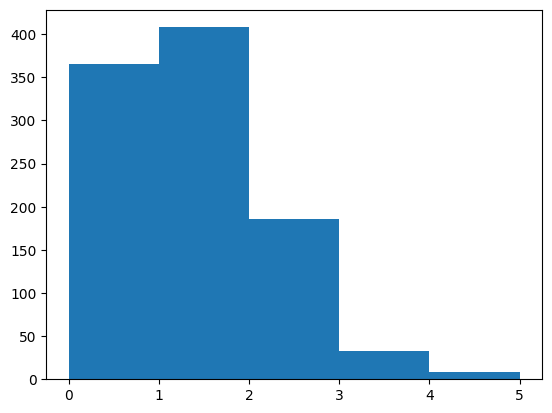

In [ ]:
plt.hist(num_successes, bins =[0,1,2,3,4,5])

In [ ]:
num_successes.shape

(4723,)

(array([4531.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

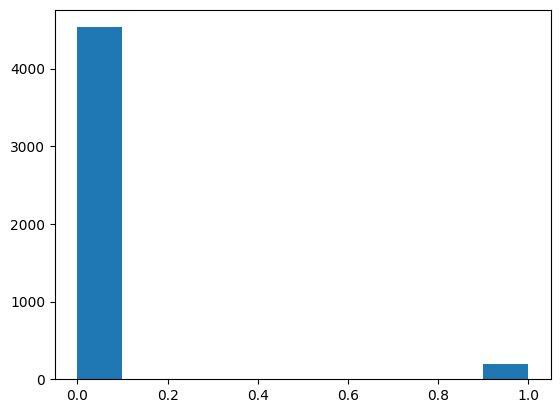

In [ ]:
plt.hist(num_successes)